In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [17]:
df = pd.read_excel("Gold_price_gbp.xlsx", parse_dates=['Date'], index_col='Date')
df = df.asfreq('B')

In [18]:
# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [19]:
# Fit ARIMA model
model = ARIMA(train, order=(5, 2, 2)) 
model_fit = model.fit()

C:\Users\Nithya\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [20]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

In [21]:
# Function for custom evaluation metrics
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    naive_forecast = np.roll(y_train, 1)[1:]
    return np.mean(np.abs(y_true - y_pred)) / np.mean(np.abs(y_train[1:] - naive_forecast))

# Evaluation metrics
axis=0
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test.values, predictions.values)
smape = symmetric_mean_absolute_percentage_error(test.values, predictions.values)
mase = mean_absolute_scaled_error(test.values, predictions.values, train.values)
r2 = r2_score(test, predictions)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'sMAPE: {smape}')
print(f'MASE: {mase}')
print(f'R2: {r2}')


MAE: 268.26935914292574
MSE: 110136.71606593698
RMSE: 331.868522258344
MAPE: 23.145554880442333
sMAPE: 26.903765714482386
MASE: 106.53517245525482
R2: -0.409520368554807


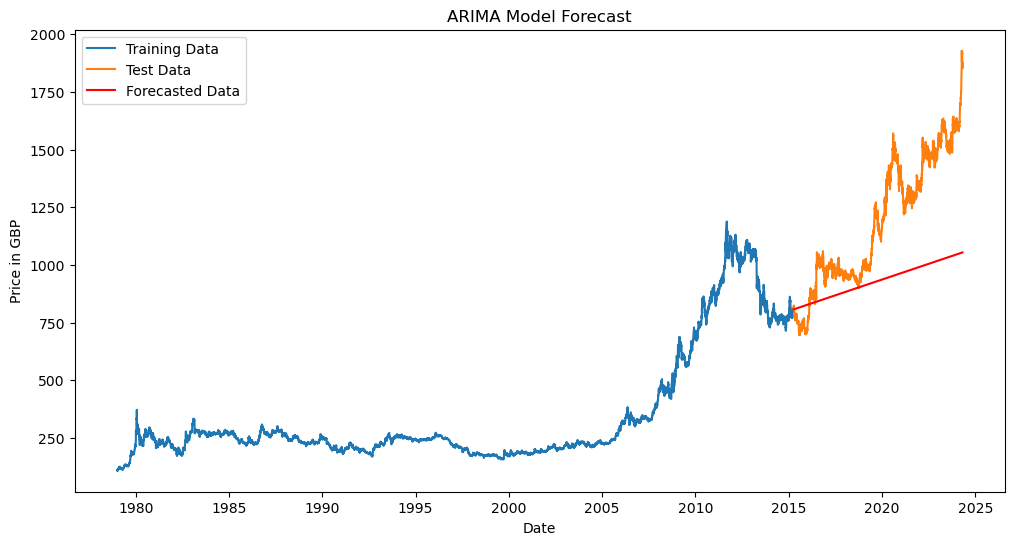

In [22]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(predictions.index, predictions, label='Forecasted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Price in GBP')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()